In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [30]:
bdf_discharge = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/Recharge/', max_file=1000)

665  files in folder
665  files loaded


In [31]:
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]
dis_x = [np.std(bb.response_at_freq2('x', drive_freq=71)) for bb in  bdf_discharge]
dis_y = [np.std(bb.response_at_freq2('y', drive_freq=71)) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


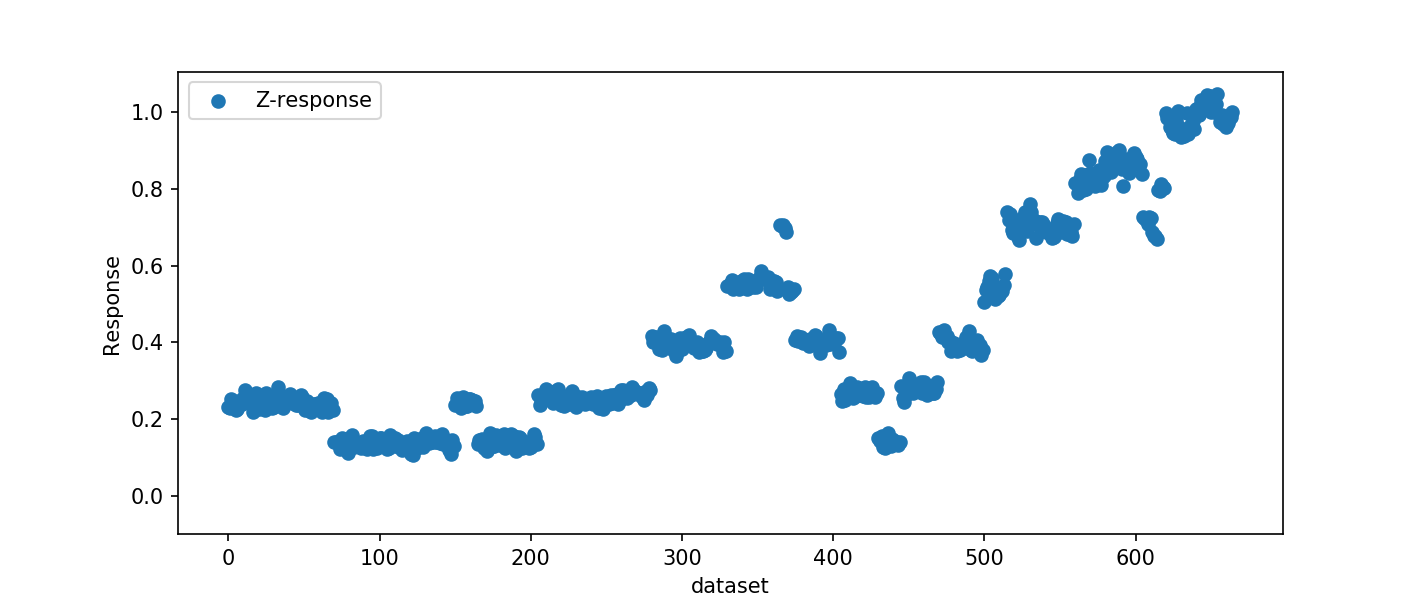

In [32]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax.scatter(range(len(dis_y)),dis_y/dis_y[-1], label='Y-response')
# ax.scatter(range(len(dis_y)),dis_x/dis_x[-1], label='Y-response')
ax.scatter(range(len(dis_y)),dis_z/dis_z[-1], label='Z-response')
ax.set(xlabel='dataset', ylabel='Response', ylim=(-0.1,None), xlim=(None,None))
ax.legend()

<IPython.core.display.Javascript object>


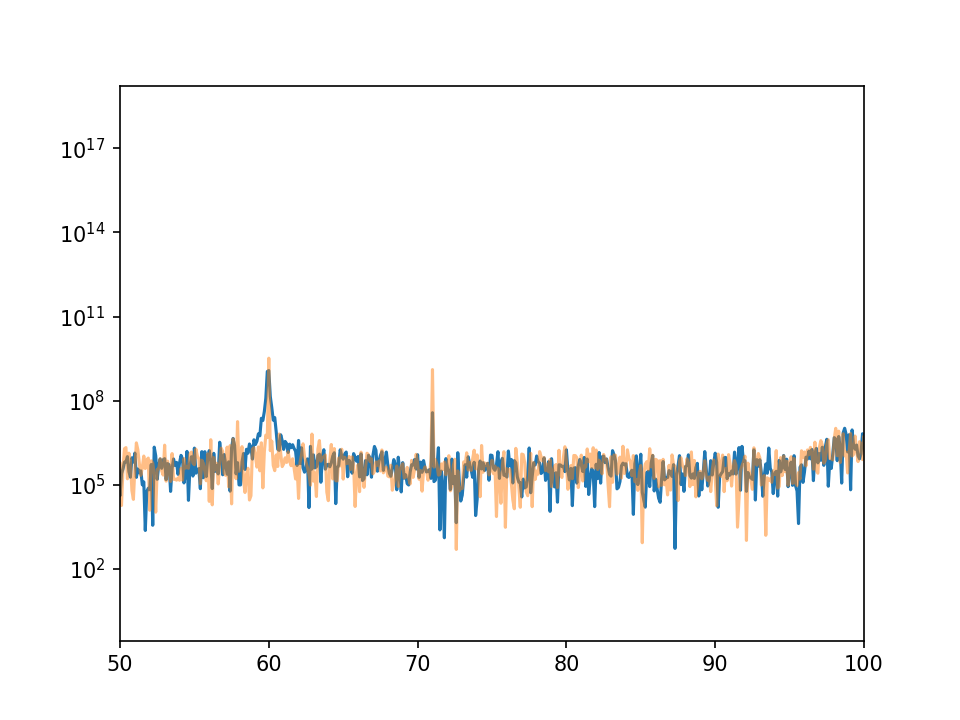

[(50, 100)]

In [17]:
bb = bdf_discharge[100]
bb1 = bdf_discharge[-1]
_,ax = plt.subplots()
ax.semilogy(*bb.psd2('z'))
ax.semilogy(*bb1.psd2('z'), alpha=0.5)
ax.set(xlim=(50,100))

In [18]:
dis_z_time = [bb.response_at_freq2('z', drive_freq=71) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


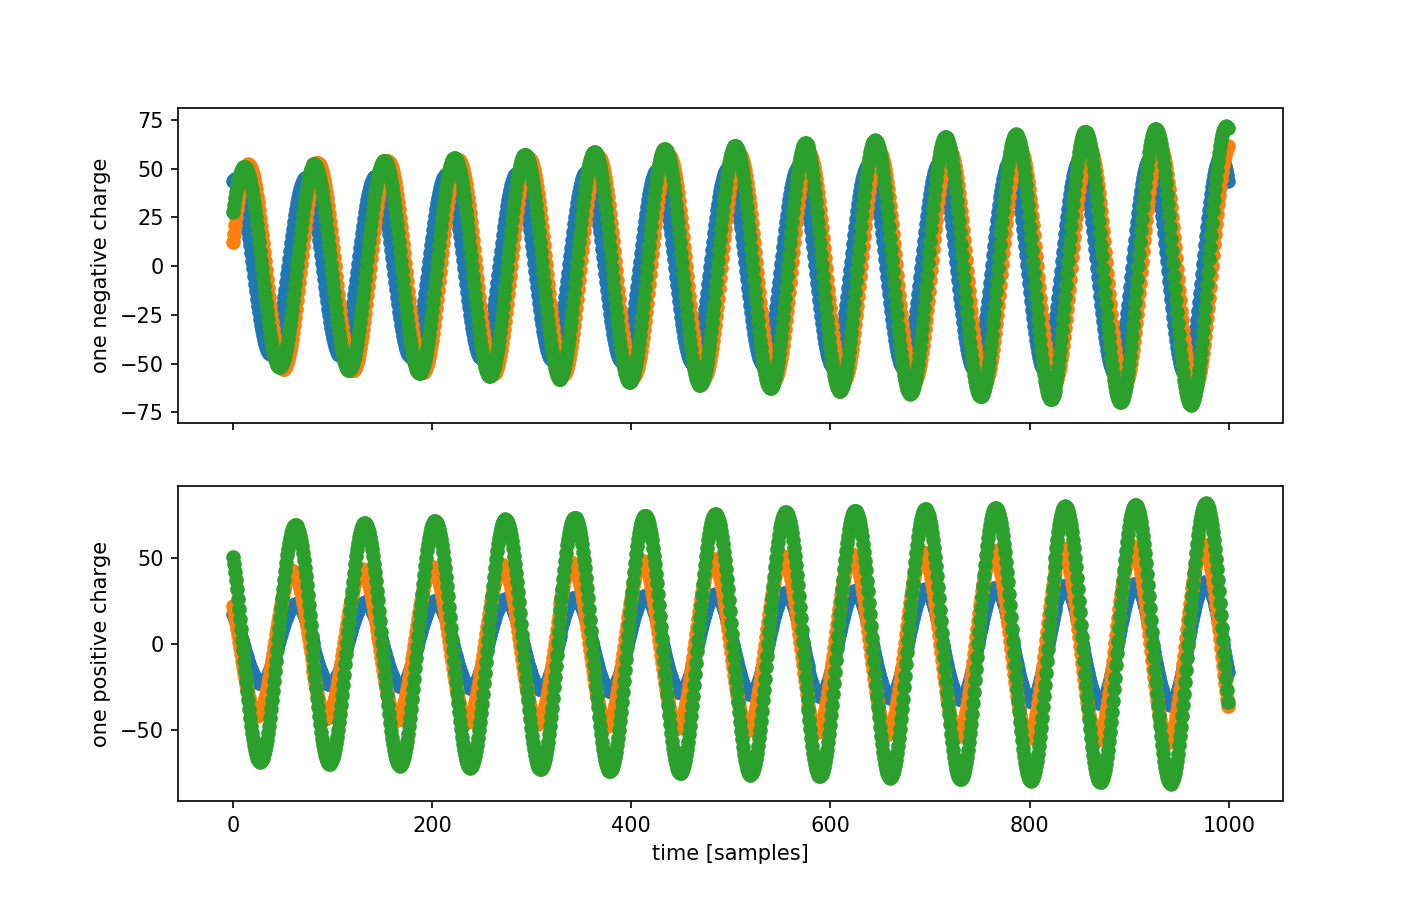

[Text(0, 0.5, 'one positive charge'), Text(0.5, 0, 'time [samples]')]

In [33]:
_,ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
[ax[0].scatter(range(1000), dis_z_time[i][:1000]) for i in range(20,23)]
ax[0].set(ylabel='one negative charge')
[ax[1].scatter(range(1000), dis_z_time[i][:1000]) for i in range(230,233)]
ax[1].set(ylabel='one positive charge', xlabel='time [samples]')

### Response

In [71]:
bdf_resp = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/Long_Response/', start_file=0, max_file=2000)

1005  files in folder
1005  files loaded


In [74]:
bdf_resp = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/New_Discharge/', start_file=0, max_file=2000)

15  files in folder
15  files loaded


In [75]:
resp_z2 = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_resp]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [72]:
resp_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_resp]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


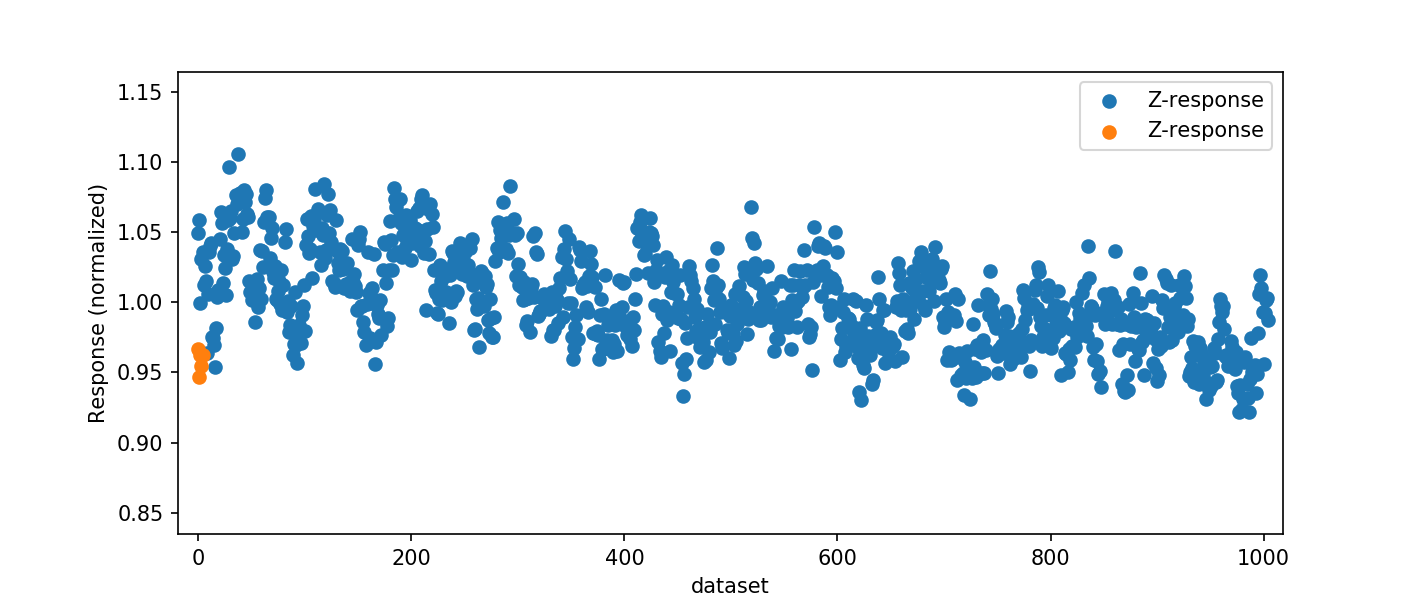

In [77]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(resp_z)),resp_z/np.mean(resp_z), label='Z-response')
ax.scatter(range(len(resp_z2)),resp_z2/np.mean(resp_z), label='Z-response')
ax.set(xlabel='dataset', ylabel='Response (normalized)')
ax.legend()

### Force sensitivity

In [26]:
bdf_z = bdf_discharge[540:545]
# bdf_x = bdf_discharge[360:365]
# bdf_y = bdf_discharge[355:360]
charges=4

In [27]:
freq = bdf_z[0].psd2('z')[0]
z_scale = np.sqrt(bdf_z[0].psd2('z')[1][freq==71])
for bb in bdf_z:
    z_scale += np.sqrt(bb.psd2('z')[1][freq==71])
z_scale /= len(bdf_z)

# freq = bdf_x[0].psd2('x')[0]
# x_scale = np.sqrt(bdf_x[0].psd2('x')[1][freq==71])
# for bb in bdf_x:
#     x_scale += np.sqrt(bb.psd2('x')[1][freq==71])
# x_scale /= len(bdf_x)

# freq = bdf_y[0].psd2('y')[0]
# y_scale = np.sqrt(bdf_y[0].psd2('y')[1][freq==71])
# for bb in bdf_y:
#     y_scale += np.sqrt(bb.psd2('y')[1][freq==71])
# y_scale /= len(bdf_y)

force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
z_scale = force/z_scale
# x_scale = force/x_scale
# y_scale = force/y_scale

In [75]:
bdf_y[0].x2.shape

(50000,)

No height data
No electrodes data
No cantilever data
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


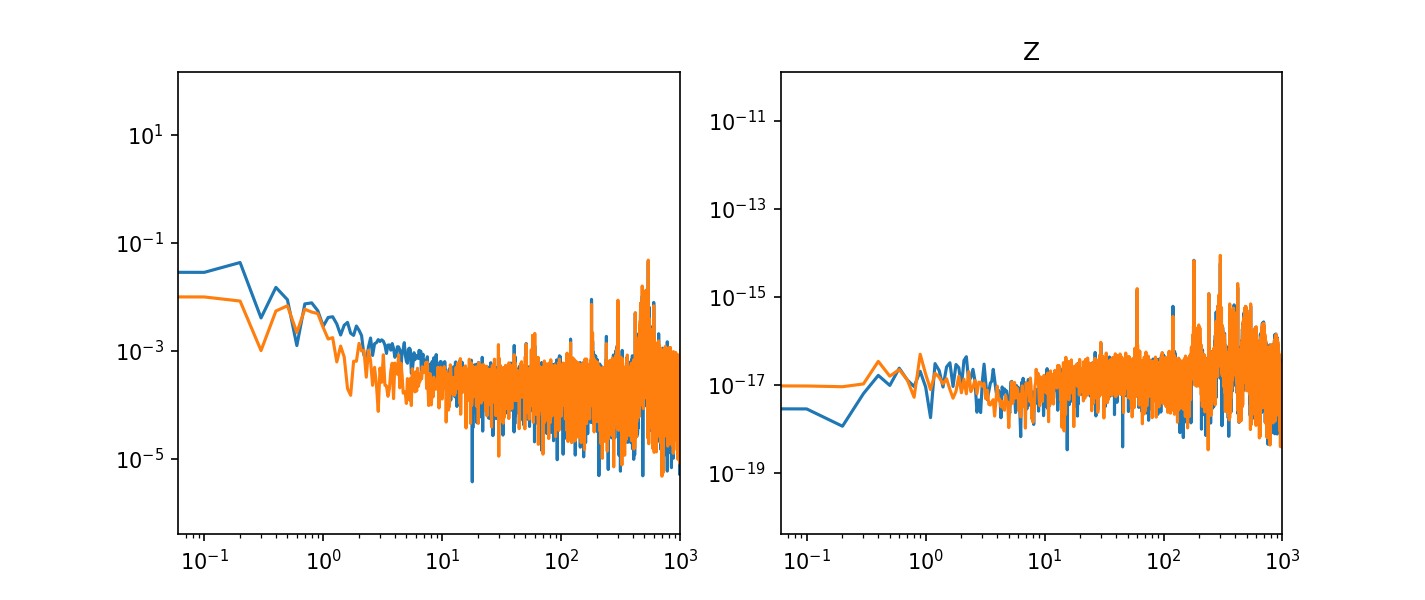

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


[(0.060270250922650814, 1000), Text(0.5, 1.0, 'Z')]

In [29]:
bb = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200320/Bead1/InitialTest/Data32.h5')
bb1 = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200320/Bead1/InitialTest/Data33.h5')
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=False)
freq, fftx = bb.psd2('x')
freq, fftx1 = bb1.psd2('x')
ax[0].loglog(freq,np.sqrt(fftx))
ax[0].loglog(freq,np.sqrt(fftx1))
# ax[0].set(xlim=(0,1000), ylabel=r'Force [N]', title='X')
freq, fftz = bb.psd2('z')
freq, fftz1 = bb1.psd2('z')
ax[1].loglog(freq,np.sqrt(fftz)*z_scale)
ax[1].loglog(freq,np.sqrt(fftz1)*z_scale)
ax[1].set(xlim=(0,1000), title='Z')

### A first look at the dataset

In [162]:
# data_bdfs = load_dir(dirname=r'/data/new_trap/20200306/Bead1/Shaking/Shaking368/', file_prefix='Shaking1_')
# data_bdfs2 = load_dir(dirname=r'/data/new_trap/20200306/Bead1/Shaking/Shaking370/', file_prefix='Shaking0', max_file=1000)
data_bdfs2 = load_dir(dirname=r'/data/new_trap/20200316/Bead1/Shaking/Shaking368/', file_prefix='Shaking1', max_file=1000)

100  files in folder
100  files loaded


In [180]:
freq = data_bdfs2[0].psd2('x')[0]
fftx1 = np.sqrt(data_bdfs2[0].psd2('x')[1])*x_scale
ffty1 = np.sqrt(data_bdfs2[0].psd2('y')[1])*y_scale
fftz1 = np.sqrt(data_bdfs2[0].psd2('z')[1])*z_scale
for i in range(1,100):
    if i!=527:
        fftx1 += np.sqrt(data_bdfs2[i].psd2('x')[1])*x_scale
        fftz1 += np.sqrt(data_bdfs2[i].psd2('z')[1])*z_scale
        ffty1 += np.sqrt(data_bdfs2[i].psd2('y')[1])*y_scale
fftx1 /= 100
ffty1 /= 100
fftz1 /= 100

<IPython.core.display.Javascript object>


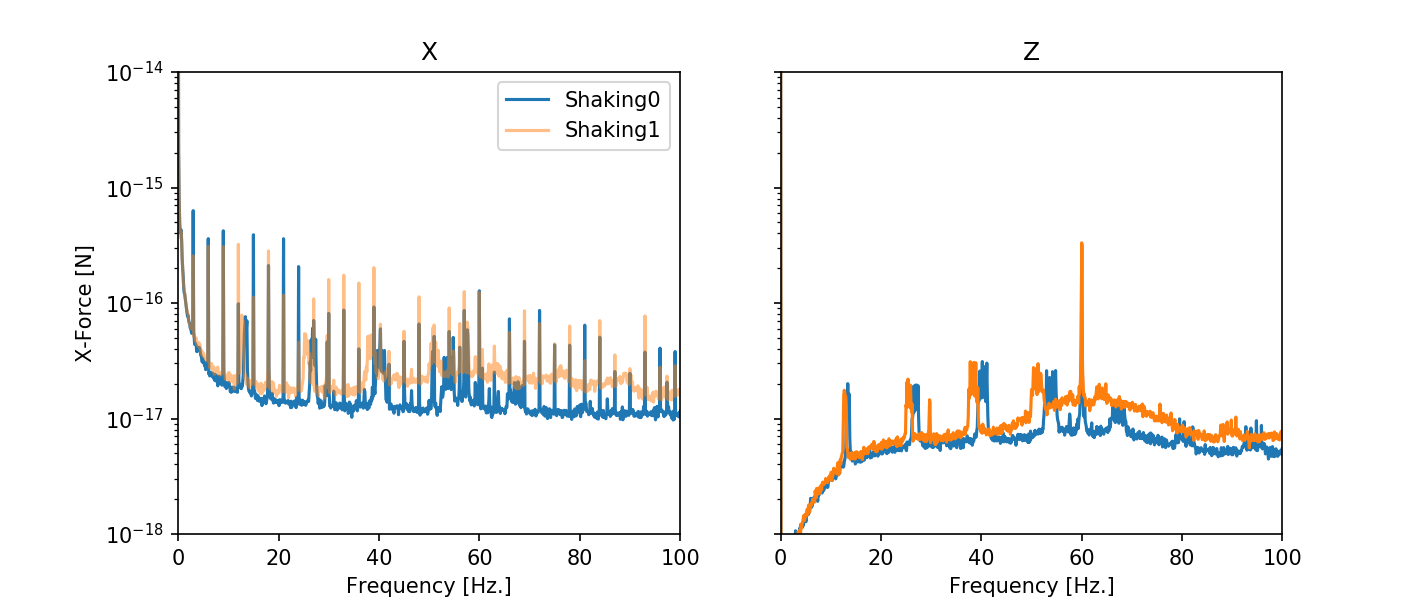

[(1e-18, 1e-14),
 (0, 100),
 Text(0.5, 0, 'Frequency [Hz.]'),
 Text(0.5, 1.0, 'Z')]

In [187]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True, sharex=True)
ax[0].semilogy(freq,fftx, label=r'Shaking0')
ax[0].semilogy(freq,fftx1, label=r'Shaking1', alpha=0.5)
ax[0].set(xlim=(0,100), ylabel=r'X-Force [N]', title='X', xlabel='Frequency [Hz.]')
ax[0].legend()

ax[1].semilogy(freq,fftz)
ax[1].semilogy(freq,fftz1)
ax[1].set(xlim=(0,100), ylim=(1e-18,1e-14), title='Z', xlabel='Frequency [Hz.]')

### Transfer function

In [52]:
# 7.6um German bead
fname = r'/data/new_trap/20200320/Bead1/TransFunc/TransFunc_X_m800k_150s.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/TransFunc_Y_m800k_150s.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/TransFunc_Z_m800k_150s.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)

tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


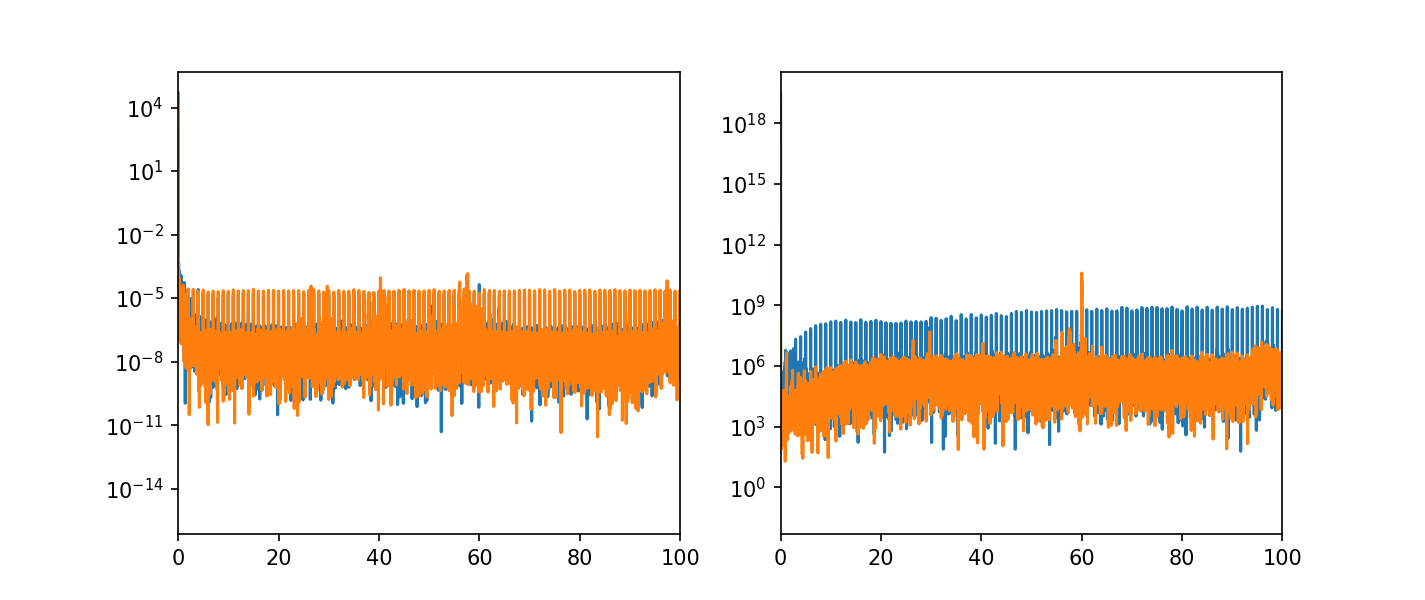

[(0, 100)]

In [54]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
ax[0].semilogy(*tf_x.psd2('x'))
ax[0].semilogy(*tf_y.psd2('y'))
ax[1].semilogy(*tf_z.psd2('z'))
ax[1].semilogy(*tf_x.psd2('z'))
ax[0].set(xlim=(0,100))

<IPython.core.display.Javascript object>


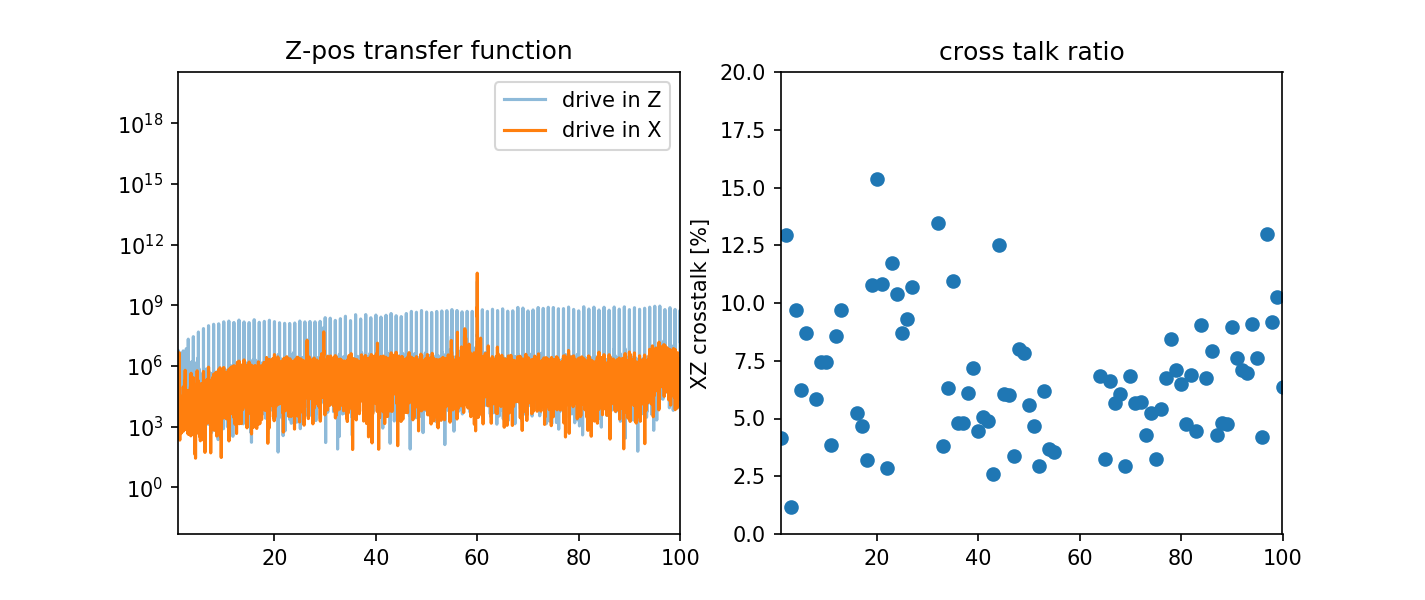

[(0, 20), Text(0, 0.5, 'XZ crosstalk [%]'), Text(0.5, 1.0, 'cross talk ratio')]

In [55]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = tf_x.psd2('z')
freq, psd_tz = tf_z.psd2('z')
ax[0].semilogy(freq, psd_tz, alpha=0.5, label='drive in Z')
ax[0].semilogy(freq, psd_tx, label='drive in X')

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%1==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,100),title='Z-pos transfer function')
ax[0].legend()
ax[1].set(ylim=(0,20), title='cross talk ratio', ylabel='XZ crosstalk [%]')

### Spin

No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


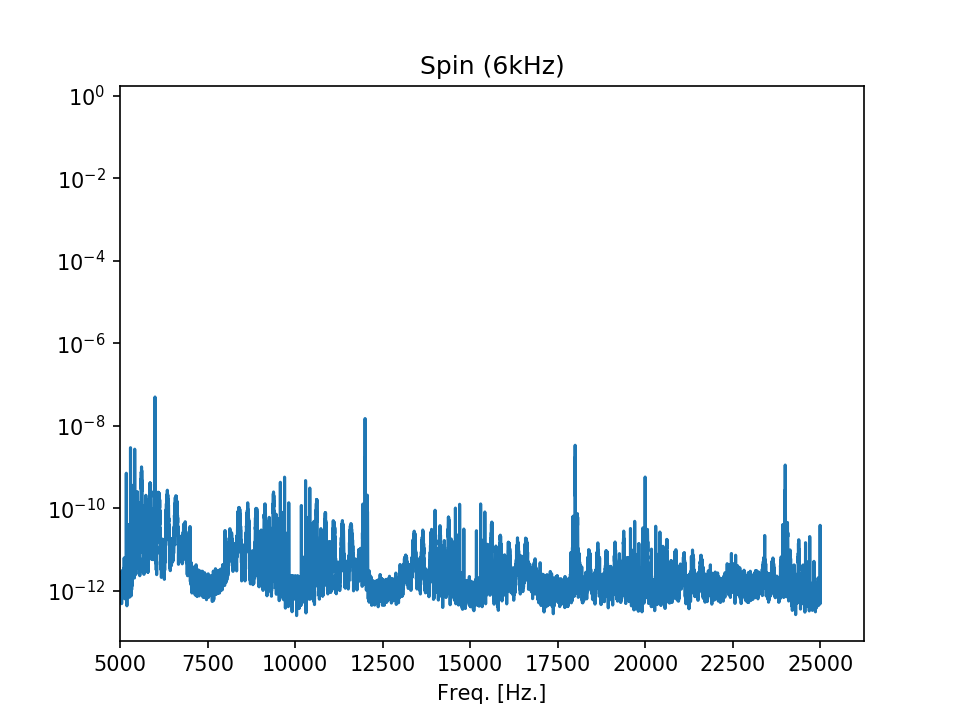

[(5000, 26250.0), Text(0.5, 0, 'Freq. [Hz.]'), Text(0.5, 1.0, 'Spin (6kHz)')]

In [48]:
bb = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200306/Bead1/InitialTest/Data85.h5')
_,ax = plt.subplots()
ax.semilogy(*bb.welch_psd('spin',res=50000))
ax.set(xlim=(5000,None), title='Spin (6kHz)', xlabel='Freq. [Hz.]')